<H1>Realevancy Checker Model </H1>

Group: 6<br>
Prepared by: Dunith and Jun Ming (Julian)<br>
Date: 22/8/2021

Trains a model to predict the relevancy of an article with the aid of CORD-19 data set and judgements.

<h2>Model Training with CORD-19 Data set</h2> <br>
1 - Imports and read in dataset <br>
2 - Text Processing <br> 
3 - Keywords Extraction <br>
4 - Features engineering <br>
5 - Model training and prediction

<h5> 1 - Import necessary libraries and packages, reads in dataset </h5>

In [1]:
#Import necessary packages and libraries
import numpy as np
import pandas as pd
from nltk.stem.porter import *
stemmer = PorterStemmer()
import re
import random
random.seed(2021)

# Import dataset
# dataset is cleaned and structured for easy operations
df_train = pd.read_excel('cord-data.xlsx')  
#df_train = df_train.dropna()    #drops the NA values

<h5> 2 - Text processing such as removing stop words, lemmatization and stemming </h5>

In [2]:
def str_stem(s): 
    """
    This function cleans the text in article such as removing stop words, stemming, standalize the cases and so on
    :param s: text / article
    :return: return processed texts
    """ 
    if isinstance(s, str):
        s = re.sub(r"([0-9])( *)\.( *)([0-9])", r"\1.\4", s)
        s = re.sub(r"([0-9]+)( *)(inches|inch|in|')\.?", r"\1in. ", s)
        s = re.sub(r"([0-9]+)( *)(foot|feet|ft|'')\.?", r"\1ft. ", s)
        s = re.sub(r"([0-9]+)( *)(pounds|pound|lbs|lb)\.?", r"\1lb. ", s)
        s = re.sub(r"([0-9]+)( *)(square|sq) ?\.?(feet|foot|ft)\.?", r"\1sq.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(cubic|cu) ?\.?(feet|foot|ft)\.?", r"\1cu.ft. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons|gallon|gal)\.?", r"\1gal. ", s)
        s = re.sub(r"([0-9]+)( *)(ounces|ounce|oz)\.?", r"\1oz. ", s)
        s = re.sub(r"([0-9]+)( *)(centimeters|cm)\.?", r"\1cm. ", s)
        s = re.sub(r"([0-9]+)( *)(milimeters|mm)\.?", r"\1mm. ", s)
        s = re.sub(r"([0-9]+)( *)(°|degrees|degree)\.?", r"\1 deg. ", s)
        s = re.sub(r"([0-9]+)( *)(v|volts|volt)\.?", r"\1 volt. ", s)
        s = re.sub(r"([0-9]+)( *)(wattage|watts|watt)\.?", r"\1 watt. ", s)
        s = re.sub(r"([0-9]+)( *)(amperes|ampere|amps|amp)\.?", r"\1 amp. ", s)
        s = re.sub(r"([0-9]+)( *)(qquart|quart)\.?", r"\1 qt. ", s)
        s = re.sub(r"([0-9]+)( *)(hours|hour|hrs.)\.?", r"\1 hr ", s)
        s = re.sub(r"([0-9]+)( *)(gallons per minute|gallon per minute|gal per minute|gallons/min.|gallons/min)\.?", r"\1 gal. per min. ", s)
        s = re.sub(r"([0-9]+)( *)(gallons per hour|gallon per hour|gal per hour|gallons/hour|gallons/hr)\.?", r"\1 gal. per hr ", s)
        # Deal with special characters
        s = s.replace("$"," ")
        s = s.replace("?"," ")
        s = s.replace("&nbsp;"," ")
        s = s.replace("&amp;","&")
        s = s.replace("&#39;","'")
        s = s.replace("/>/Agt/>","")
        s = s.replace("</a<gt/","")
        s = s.replace("gt/>","")
        s = s.replace("/>","")
        s = s.replace("<br","")
        s = s.replace("<.+?>","")
        s = s.replace("[ &<>)(_,;:!?\+^~@#\$]+"," ")
        s = s.replace("'s\\b","")
        s = s.replace("[']+","")
        s = s.replace("[\"]+","")
        s = s.replace("-"," ")
        s = s.replace("+"," ")
        # Remove text between paranthesis/brackets)
        s = s.replace("[ ]?[[(].+?[])]","")
        # remove sizes
        s = s.replace("size: .+$","")
        s = s.replace("size [0-9]+[.]?[0-9]+\\b","")
        
        
        return " ".join([stemmer.stem(re.sub('[^A-Za-z0-9-./]', ' ', word)) for word in s.lower().split()])
    else:
        return "null"
    
# clean the query term and the doc/article
df_train['query'] = df_train['query'].apply(str_stem)
df_train['document'] = df_train['full_text'].apply(str_stem)
df_train

,query,round,doc_id,relevancy,full_text,document
0,coronaviru origin,2,6ml0puh8,1,Review\n\nMiddle East respiratory syndrome\nco...,review middl east respiratori syndrom coronavi...
1,coronaviru origin,2,0khg28ex,0,NaN,null
2,coronaviru origin,2,16rgt4ca,0,Licciardi et al. Pediatric Rheumatology\n(2020...,licciardi et al. pediatr rheumatolog 2020 18...
3,coronaviru origin,2,1bvsn9e8,1,"Pathogens and Disease, 77, 2019, ftaa006\ndoi:...",pathogen and disease 77 2019 ftaa006 doi 1...
4,coronaviru respons to weather chang,2,03id5o2g,0,ARTICLE\nhttps://doi.org/10.1038/s41467-019-13...,articl https //doi.org/10.1038/s41467 019 1365...
...,...,...,...,...,...,...
130,coronaviru recoveri,2,bzc7luwj,1,medRxiv preprint doi: https://doi.org/10.1101/...,medrxiv preprint doi https //doi.org/10.1101/...
131,coronaviru recoveri,2,c4bera7b,0,Research in Social and Administrative Pharmacy...,research in social and administr pharmaci 17 ...
132,coronaviru public dataset,2,yq05djrc,1,TRANSLATIONAL KNOWLEDGE MAP OF COVID-19\nCesar...,translat knowledg map of covid 19 cesar aguado...
133,coronaviru public dataset,2,z0bkpmpk,1,arXiv:2004.04569v2 [eess.IV] 9 May 2020\n\nCOV...,arxiv 2004.04569 volt. 2 eess.iv 9 may 2020 ...


<h5> 3 - Extracts the keywords from article by using TF-IDF </h5>

In [3]:
import pandas as pd 
from sklearn.feature_extraction.text import TfidfTransformer 
from sklearn.feature_extraction.text import CountVectorizer 
 

def compute_tf_idf(corpus):
    """
    This function computes the TF-IDF of the article to extract the keywords from the article.
    :param corpus: article/document
    :return: a table of keywords with its tf-idf values 
    """
    
    docs = corpus.split('.')
    
    #instantiate CountVectorizer() 
    cv=CountVectorizer() 

    # this steps generates word counts for the words in your docs 
    word_count_vector=cv.fit_transform(docs)


    word_count_vector.shape

    tfidf_transformer=TfidfTransformer(smooth_idf=True,use_idf=True) 
    tfidf_transformer.fit(word_count_vector)

    # print idf values 
    df_idf = pd.DataFrame(tfidf_transformer.idf_, index=cv.get_feature_names(),columns=["idf_weights"]) 

    # sort ascending 
    df_idf.sort_values(by=['idf_weights'])

    # count matrix 
    count_vector=cv.transform(docs) 

    # tf-idf scores 
    tf_idf_vector=tfidf_transformer.transform(count_vector)

    feature_names = cv.get_feature_names() 
    
    #get tfidf vector for first document 
    first_document_vector=tf_idf_vector[0] 

    
    #print the scores 
    df = pd.DataFrame(first_document_vector.T.todense(), index=feature_names, columns=["tfidf"]) 
    res = df.sort_values(by=["tfidf"],ascending=False)

    return res



# process all documents in the dataset
all_corpus = df_train.loc[:,'document']

# Creates new cols of keyword 1 to keyword 5 for each row
for i in range(len(all_corpus)):
    corpus = all_corpus[i]
    if corpus != 'null':
        tf_idf = compute_tf_idf(all_corpus[i])
        features = tf_idf.index[0:5]
        df_train.at[i,'keyword_1'] = features[0]
        df_train.at[i,'keyword_2'] = features[1]
        df_train.at[i,'keyword_3'] = features[2]
        df_train.at[i,'keyword_4'] = features[3]
        df_train.at[i,'keyword_5'] = features[4]
        
tf_idf

,tfidf
doi,0.789979
https,0.394989
medrxiv,0.332992
preprint,0.330202
02,0.000000
...,...
analysi,0.000000
an,0.000000
among,0.000000
although,0.000000


<h5> 4 - Engineers the keywords into features for prediction </h5>

In [4]:
def str_common_word(str1, str2):
    """
    Counts the common word in two strings
    :param str1: a source string
    :param str2: a target string
    :return: the number of times of the common word
    """
    str1, str2 = str1.lower(), str2.lower()
    words, count = str1.split(), 0
    for word in words:
        if str2.find(word)>=0:
            count+=1
    return count
    
def str_whole_word(str1, str2, i_):
    """
    Counts the whole word from the source string in the target string
    :param str1: a source string
    :param str2: a target string
    :param i_: index of the search
    :return: the number of times of the found whole word
    """
    str1, str2 = str1.lower().strip(), str2.lower().strip()
    count = 0
    while i_ < len(str2):
        i_ = str2.find(str1, i_)
        if i_ == -1:
            return count
        else:
            count += 1
            i_ += len(str1)
    return count


# Drops the rows with NA values
df_train = df_train.dropna()


# Creates new columns of the features of the query term, doc, and from keyword 1 to keyword 5
df_train['word_len_of_query'] = df_train['query'].apply(lambda x:len(x.split())).astype(np.int64)
df_train['word_len_of_document'] = df_train['document'].apply(lambda x:len(x.split())).astype(np.int64)
df_train['word_len_of_kw1'] = df_train['keyword_1'].apply(lambda x:len(str(x).split())).astype(np.int64)
df_train['word_len_of_kw2'] = df_train['keyword_2'].apply(lambda x:len(str(x).split())).astype(np.int64)
df_train['word_len_of_kw3'] = df_train['keyword_3'].apply(lambda x:len(str(x).split())).astype(np.int64)
df_train['word_len_of_kw4'] = df_train['keyword_4'].apply(lambda x:len(str(x).split())).astype(np.int64)
df_train['word_len_of_kw5'] = df_train['keyword_5'].apply(lambda x:len(str(x).split())).astype(np.int64)


# Query & Document
# Create a new column that combine "query" and "total_document" 
df_train['total_info'] = df_train['query']+"\t"+df_train['document'] 
# Number of times the entire search term appears in total document. 
df_train['query_in_document'] = df_train['total_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[1],0))
# Number of words that appear in search term also appear in total document.
df_train['word_in_document'] = df_train['total_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
# The ratio of total document word length to search term word length
df_train['query_document_len_prop']=df_train['word_len_of_document']/df_train['word_len_of_query']
# The ratio of total document and search term common word count to search term word count
df_train['ratio_document'] = df_train['word_in_document']/df_train['word_len_of_query']




# Keyword 1 & Document
# Create a new column that combine "query" and "total_document" 
df_train['keyword_doc1'] = df_train['keyword_1']+"\t"+df_train['document'] 
# Number of times the entire search term appears in total document. 
df_train['kw1_in_document'] = df_train['keyword_doc1'].apply(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
# Number of words that appear in search term also appear in total document.
df_train['word_in_document'] = df_train['keyword_doc1'].apply(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
# The ratio of total document word length to search term word length
df_train['kw1_document_len_prop']=df_train['word_len_of_document']/df_train['word_len_of_kw1']
# The ratio of total document and search term common word count to search term word count
df_train['kw1_ratio_document'] = df_train['word_in_document']/df_train['word_len_of_kw1']


# Keyword 2 & Document
# Create a new column that combine "query" and "total_document" 
df_train['keyword_doc2'] = df_train['keyword_2']+"\t"+df_train['document'] 
# Number of times the entire search term appears in total document. 
df_train['kw2_in_document'] = df_train['keyword_doc2'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
# Number of words that appear in search term also appear in total document.
df_train['word_in_document'] = df_train['keyword_doc2'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
# The ratio of total document word length to search term word length
df_train['kw2_document_len_prop']=df_train['word_len_of_document']/df_train['word_len_of_kw2']
# The ratio of total document and search term common word count to search term word count
df_train['kw2_ratio_document'] = df_train['word_in_document']/df_train['word_len_of_kw2']


# Keyword 3 & Document
# Create a new column that combine "query" and "total_document" 
df_train['keyword_doc3'] = df_train['keyword_3']+"\t"+df_train['document'] 
# Number of times the entire search term appears in total document. 
df_train['kw3_in_document'] = df_train['keyword_doc3'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
# Number of words that appear in search term also appear in total document.
df_train['word_in_document'] = df_train['keyword_doc3'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
# The ratio of total document word length to search term word length
df_train['kw3_document_len_prop']=df_train['word_len_of_document']/df_train['word_len_of_kw3']
# The ratio of total document and search term common word count to search term word count
df_train['kw3_ratio_document'] = df_train['word_in_document']/df_train['word_len_of_kw3']


# Keyword 4 & Document
# Create a new column that combine "query" and "total_document" 
df_train['keyword_doc4'] = df_train['keyword_4']+"\t"+df_train['document'] 
# Number of times the entire search term appears in total document. 
df_train['kw4_in_document'] = df_train['keyword_doc4'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
# Number of words that appear in search term also appear in total document.
df_train['word_in_document'] = df_train['keyword_doc4'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
# The ratio of total document word length to search term word length
df_train['kw4_document_len_prop']=df_train['word_len_of_document']/df_train['word_len_of_kw4']
# The ratio of total document and search term common word count to search term word count
df_train['kw4_ratio_document'] = df_train['word_in_document']/df_train['word_len_of_kw4']


# Keyword 5 & Document
# Create a new column that combine "query" and "total_document" 
df_train['keyword_doc5'] = df_train['keyword_5']+"\t"+df_train['document'] 
# Number of times the entire search term appears in total document. 
df_train['kw5_in_document'] = df_train['keyword_doc5'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
# Number of words that appear in search term also appear in total document.
df_train['word_in_document'] = df_train['keyword_doc5'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
# The ratio of total document word length to search term word length
df_train['kw5_document_len_prop']=df_train['word_len_of_document']/df_train['word_len_of_kw5']
# The ratio of total document and search term common word count to search term word count
df_train['kw5_ratio_document'] = df_train['word_in_document']/df_train['word_len_of_kw5']
    

/var/folders/3d/0mm5wkcn54xd9wx7q9nzfqg00000gn/T/ipykernel_69304/2398617913.py:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['word_len_of_query'] = df_train['query'].apply(lambda x:len(x.split())).astype(np.int64)
/var/folders/3d/0mm5wkcn54xd9wx7q9nzfqg00000gn/T/ipykernel_69304/2398617913.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['word_len_of_document'] = df_train['document'].apply(lambda x:len(x.split())).astype(np.int64)
/var/folders/3d/0mm5wkcn54xd9wx7q9nzfqg00000gn/T/ipy

In [5]:
# a glance on the data set
df_train

,query,round,doc_id,relevancy,full_text,document,keyword_1,keyword_2,keyword_3,keyword_4,...,kw3_document_len_prop,kw3_ratio_document,keyword_doc4,kw4_in_document,kw4_document_len_prop,kw4_ratio_document,keyword_doc5,kw5_in_document,kw5_document_len_prop,kw5_ratio_document
0,coronaviru origin,2,6ml0puh8,1,Review\n\nMiddle East respiratory syndrome\nco...,review middl east respiratori syndrom coronavi...,jaffar,phylogenet,evolut,review,...,5298.0,1.0,review\treview middl east respiratori syndrom ...,9,5298.0,1.0,coronavirus\treview middl east respiratori syn...,17,5298.0,1.0
2,coronaviru origin,2,16rgt4ca,0,Licciardi et al. Pediatric Rheumatology\n(2020...,licciardi et al. pediatr rheumatolog 2020 18...,licciardi,al,et,000,...,5162.0,1.0,000\tlicciardi et al. pediatr rheumatolog 202...,6,5162.0,1.0,oxygen\tlicciardi et al. pediatr rheumatolog ...,1,5162.0,1.0
3,coronaviru origin,2,1bvsn9e8,1,"Pathogens and Disease, 77, 2019, ftaa006\ndoi:...",pathogen and disease 77 2019 ftaa006 doi 1...,ftaa006,77,disease,pathogen,...,3843.0,1.0,pathogen\tpathogen and disease 77 2019 ftaa...,10,3843.0,1.0,doi\tpathogen and disease 77 2019 ftaa006 d...,15,3843.0,1.0
4,coronaviru respons to weather chang,2,03id5o2g,0,ARTICLE\nhttps://doi.org/10.1038/s41467-019-13...,articl https //doi.org/10.1038/s41467 019 1365...,articl,https,doi,nucleated,...,5271.0,1.0,nucleated\tarticl https //doi.org/10.1038/s414...,1,5271.0,1.0,obtain\tarticl https //doi.org/10.1038/s41467 ...,1,5271.0,1.0
5,coronaviru respons to weather chang,2,0oqcx0az,1,Science of the Total Environment 701 (2020) 13...,scienc of the total environ 701 2020 134607 ...,scienc,total,environ,content,...,5619.0,1.0,content\tscienc of the total environ 701 2020...,1,5619.0,1.0,www\tscienc of the total environ 701 2020 13...,1,5619.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,coronaviru recoveri,2,bzc7luwj,1,medRxiv preprint doi: https://doi.org/10.1101/...,medrxiv preprint doi https //doi.org/10.1101/...,doi,https,medrxiv,preprint,...,5432.0,1.0,preprint\tmedrxiv preprint doi https //doi.or...,31,5432.0,1.0,ocular\tmedrxiv preprint doi https //doi.org/...,3,5432.0,1.0
131,coronaviru recoveri,2,c4bera7b,0,Research in Social and Administrative Pharmacy...,research in social and administr pharmaci 17 ...,administr,research,social,pharmaci,...,2932.0,1.0,pharmaci\tresearch in social and administr pha...,61,2932.0,1.0,list\tresearch in social and administr pharmac...,1,2932.0,1.0
132,coronaviru public dataset,2,yq05djrc,1,TRANSLATIONAL KNOWLEDGE MAP OF COVID-19\nCesar...,translat knowledg map of covid 19 cesar aguado...,victor,aguado,cort,cesar,...,2102.0,1.0,cesar\ttranslat knowledg map of covid 19 cesar...,1,2102.0,1.0,translat\ttranslat knowledg map of covid 19 ce...,6,2102.0,1.0
133,coronaviru public dataset,2,z0bkpmpk,1,arXiv:2004.04569v2 [eess.IV] 9 May 2020\n\nCOV...,arxiv 2004.04569 volt. 2 eess.iv 9 may 2020 ...,2004,arxiv,pocus,pocovid,...,1311.0,1.0,pocovid\tarxiv 2004.04569 volt. 2 eess.iv 9 ...,1,1311.0,1.0,pneumonia\tarxiv 2004.04569 volt. 2 eess.iv ...,3,1311.0,1.0


In [6]:
# Checks all the columns to drop the unnecessary cols for model training
df_train.columns

Index(['query', 'round', 'doc_id', 'relevancy', 'full_text', 'document',
       'keyword_1', 'keyword_2', 'keyword_3', 'keyword_4', 'keyword_5',
       'word_len_of_query', 'word_len_of_document', 'word_len_of_kw1',
       'word_len_of_kw2', 'word_len_of_kw3', 'word_len_of_kw4',
       'word_len_of_kw5', 'total_info', 'query_in_document',
       'word_in_document', 'query_document_len_prop', 'ratio_document',
       'keyword_doc1', 'kw1_in_document', 'kw1_document_len_prop',
       'kw1_ratio_document', 'keyword_doc2', 'kw2_in_document',
       'kw2_document_len_prop', 'kw2_ratio_document', 'keyword_doc3',
       'kw3_in_document', 'kw3_document_len_prop', 'kw3_ratio_document',
       'keyword_doc4', 'kw4_in_document', 'kw4_document_len_prop',
       'kw4_ratio_document', 'keyword_doc5', 'kw5_in_document',
       'kw5_document_len_prop', 'kw5_ratio_document'],
      dtype='object')

In [7]:
# only keeps the necessary cols for model training
df_train.drop(['query','round','doc_id','full_text','document','total_info','keyword_1','keyword_2','keyword_3','keyword_4','keyword_5','query_in_document', 'kw1_ratio_document','kw2_ratio_document','kw3_ratio_document','kw4_ratio_document','kw5_ratio_document','keyword_doc1','keyword_doc2','keyword_doc3','keyword_doc4','keyword_doc5'], axis=1, inplace=True)

/Users/yijulee/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4901: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [8]:
df_train.columns

Index(['relevancy', 'word_len_of_query', 'word_len_of_document',
       'word_len_of_kw1', 'word_len_of_kw2', 'word_len_of_kw3',
       'word_len_of_kw4', 'word_len_of_kw5', 'word_in_document',
       'query_document_len_prop', 'ratio_document', 'kw1_in_document',
       'kw1_document_len_prop', 'kw2_in_document', 'kw2_document_len_prop',
       'kw3_in_document', 'kw3_document_len_prop', 'kw4_in_document',
       'kw4_document_len_prop', 'kw5_in_document', 'kw5_document_len_prop'],
      dtype='object')

<h5> 5 - Trains the model and test its accuracy</h5> 

In [9]:
# Training/Prediction
# Model 1: Using Random Forest

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Separate the relevancy col and the rest of features cols
X = df_train.loc[:, df_train.columns != 'relevancy']
y = df_train.loc[:, df_train.columns == 'relevancy']

# print(X)


# Encode the features using one hot encoder since there's strings features
# temp = OneHotEncoder().fit_transform(X).toarray()
# X = temp

# print(X)
# print(len(X[0]))

# Splits the data into train and test sets with 70% and 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Fits the data to a random forest
rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=0)
rf.fit(X_train, y_train.values.ravel())

# Makes prediction using random forest
y_pred = rf.predict(X_test)
# Calculates the root mean squared erros
rf_mse = mean_squared_error(y_pred, y_test, squared = False)
print('RandomForest RMSE: %.4f' % rf_mse)


RandomForest RMSE: 0.4630


In [10]:
# Model 2: Using Support Vector Machine

# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred2 = clf.predict(X_test)

/Users/yijulee/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [11]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

Accuracy: 0.6341463414634146


<H2> Predicting relevance between input article and query term </H2>


<h5> 1 - Converts pdf file (article) to text file to extract the texts from the article</h5>

In [12]:
#Downloading pdf file from the web
import requests
file_url = "https://www.medrxiv.org/content/10.1101/2020.04.08.20057661v1.full.pdf"
  
r = requests.get(file_url, stream = True)
  
with open("python.pdf","wb") as pdf:
    for chunk in r.iter_content(chunk_size=1024):
  
         # writing one chunk at a time to pdf file
         if chunk:
             pdf.write(chunk)

In [13]:
# importing required modules 
import PyPDF2 
    
# creating a pdf file object 
pdfFileObj = open('python.pdf', 'rb') 
    
# creating a pdf reader object 
pdfReader = PyPDF2.PdfFileReader(pdfFileObj) 
    
# printing number of pages in pdf file 
x = pdfReader.numPages
    
# creating a page object 
pageObj = pdfReader.getPage(x-1) 
    
# extracting text from page 
text = pageObj.extractText()

# so we are extracting each page and putting in to the array, and then we are joining them with a space
text_doc = []

for i in range(0, x):
    pageObj = pdfReader.getPage(i)
    text = pageObj.extractText()
    text_doc.append(text)
    
complete_text_doc = " ".join(text_doc)
complete_text_doc = complete_text_doc.replace("\n", "")
               

<h5> 2 - Inputs processing and prediction <h5>

In [14]:
def compute_prediction(query_term, artcle):
    data = {'query':[str(query_term)], 'document':[str(article)]}
    my_data = pd.DataFrame(data)

    # clean the query term and the doc/article
    my_data['query'] = my_data['query'].apply(str_stem)
    my_data['document'] = my_data['document'].apply(str_stem)

    # process all documents in the dataset
    corpus = my_data.loc[:,'document']


    # Doc must be at least 5 words length
    # Creates new cols of keyword 1 to keyword 5 for each row
    tf_idf = compute_tf_idf(corpus[0])
    features = tf_idf.index[0:5]
    my_data.at[0,'keyword_1'] = features[0]
    my_data.at[0,'keyword_2'] = features[1]
    my_data.at[0,'keyword_3'] = features[2]
    my_data.at[0,'keyword_4'] = features[3]
    my_data.at[0,'keyword_5'] = features[4]

    # Drops the rows with NA values
    my_data = my_data.dropna()


    # Creates new columns of the features of the query term, doc, and from keyword 1 to keyword 5
    my_data['word_len_of_query'] = my_data['query'].apply(lambda x:len(x.split())).astype(np.int64)
    my_data['word_len_of_document'] = my_data['document'].apply(lambda x:len(x.split())).astype(np.int64)
    my_data['word_len_of_kw1'] = my_data['keyword_1'].apply(lambda x:len(str(x).split())).astype(np.int64)
    my_data['word_len_of_kw2'] = my_data['keyword_2'].apply(lambda x:len(str(x).split())).astype(np.int64)
    my_data['word_len_of_kw3'] = my_data['keyword_3'].apply(lambda x:len(str(x).split())).astype(np.int64)
    my_data['word_len_of_kw4'] = my_data['keyword_4'].apply(lambda x:len(str(x).split())).astype(np.int64)
    my_data['word_len_of_kw5'] = my_data['keyword_5'].apply(lambda x:len(str(x).split())).astype(np.int64)


    # Query & Document
    # Create a new column that combine "query" and "total_document" 
    my_data['total_info'] = my_data['query']+"\t"+my_data['document'] 
    # Number of times the entire search term appears in total document. 
    my_data['query_in_document'] = my_data['total_info'].map(lambda x:str_whole_word(x.split('\t')[0],x.split('\t')[1],0))
    # Number of words that appear in search term also appear in total document.
    my_data['word_in_document'] = my_data['total_info'].map(lambda x:str_common_word(x.split('\t')[0],x.split('\t')[1]))
    # The ratio of total document word length to search term word length
    my_data['query_document_len_prop']=my_data['word_len_of_document']/my_data['word_len_of_query']
    # The ratio of total document and search term common word count to search term word count
    my_data['ratio_document'] = my_data['word_in_document']/my_data['word_len_of_query']




    # Keyword 1 & Document
    # Create a new column that combine "query" and "total_document" 
    my_data['keyword_doc1'] = my_data['keyword_1']+"\t"+my_data['document'] 
    # Number of times the entire search term appears in total document. 
    my_data['kw1_in_document'] = my_data['keyword_doc1'].apply(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
    # Number of words that appear in search term also appear in total document.
    my_data['word_in_document'] = my_data['keyword_doc1'].apply(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
    # The ratio of total document word length to search term word length
    my_data['kw1_document_len_prop']=my_data['word_len_of_document']/my_data['word_len_of_kw1']
    # The ratio of total document and search term common word count to search term word count
    my_data['kw1_ratio_document'] = my_data['word_in_document']/my_data['word_len_of_kw1']


    # Keyword 2 & Document
    # Create a new column that combine "query" and "total_document" 
    my_data['keyword_doc2'] = my_data['keyword_2']+"\t"+my_data['document'] 
    # Number of times the entire search term appears in total document. 
    my_data['kw2_in_document'] = my_data['keyword_doc2'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
    # Number of words that appear in search term also appear in total document.
    my_data['word_in_document'] = my_data['keyword_doc2'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
    # The ratio of total document word length to search term word length
    my_data['kw2_document_len_prop']=my_data['word_len_of_document']/my_data['word_len_of_kw2']
    # The ratio of total document and search term common word count to search term word count
    my_data['kw2_ratio_document'] = my_data['word_in_document']/my_data['word_len_of_kw2']


    # Keyword 3 & Document
    # Create a new column that combine "query" and "total_document" 
    my_data['keyword_doc3'] = my_data['keyword_3']+"\t"+my_data['document'] 
    # Number of times the entire search term appears in total document. 
    my_data['kw3_in_document'] = my_data['keyword_doc3'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
    # Number of words that appear in search term also appear in total document.
    my_data['word_in_document'] = my_data['keyword_doc3'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
    # The ratio of total document word length to search term word length
    my_data['kw3_document_len_prop']=my_data['word_len_of_document']/my_data['word_len_of_kw3']
    # The ratio of total document and search term common word count to search term word count
    my_data['kw3_ratio_document'] = my_data['word_in_document']/my_data['word_len_of_kw3']


    # Keyword 4 & Document
    # Create a new column that combine "query" and "total_document" 
    my_data['keyword_doc4'] = my_data['keyword_4']+"\t"+my_data['document'] 
    # Number of times the entire search term appears in total document. 
    my_data['kw4_in_document'] = my_data['keyword_doc4'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
    # Number of words that appear in search term also appear in total document.
    my_data['word_in_document'] = my_data['keyword_doc4'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
    # The ratio of total document word length to search term word length
    my_data['kw4_document_len_prop']=my_data['word_len_of_document']/my_data['word_len_of_kw4']
    # The ratio of total document and search term common word count to search term word count
    my_data['kw4_ratio_document'] = my_data['word_in_document']/my_data['word_len_of_kw4']


    # Keyword 5 & Document
    # Create a new column that combine "query" and "total_document" 
    my_data['keyword_doc5'] = my_data['keyword_5']+"\t"+my_data['document'] 
    # Number of times the entire search term appears in total document. 
    my_data['kw5_in_document'] = my_data['keyword_doc5'].map(lambda x:str_whole_word(str(x).split('\t')[0],str(x).split('\t')[1],0))
    # Number of words that appear in search term also appear in total document.
    my_data['word_in_document'] = my_data['keyword_doc5'].map(lambda x:str_common_word(str(x).split('\t')[0],str(x).split('\t')[1]))
    # The ratio of total document word length to search term word length
    my_data['kw5_document_len_prop']=my_data['word_len_of_document']/my_data['word_len_of_kw5']
    # The ratio of total document and search term common word count to search term word count
    my_data['kw5_ratio_document'] = my_data['word_in_document']/my_data['word_len_of_kw5']

    # Checks all the columns to drop the unnecessary cols for model training
    my_data.columns

    # only keeps the necessary cols for model training
    my_data.drop(['query','document','total_info','keyword_1','keyword_2','keyword_3','keyword_4','keyword_5','query_in_document', 'kw1_ratio_document','kw2_ratio_document','kw3_ratio_document','kw4_ratio_document','kw5_ratio_document','keyword_doc1','keyword_doc2','keyword_doc3','keyword_doc4','keyword_doc5'], axis=1, inplace=True)

    x = my_data.loc[:, my_data.columns != 'relevancy']

    # Encode the features using one hot encoder since there's strings features
    # temp = OneHotEncoder().fit_transform(x).toarray()
    # x = temp

    # Predict the response for test dataset
    rf_y_pred = rf.predict(x)
    clf_y_pred = clf.predict(x)

    return rf_y_pred


In [15]:
query_term = 'test query'
article = 'just soMe Sentences in here'
compute_prediction(query_term,article)


array([0.9])

In [16]:
from goose3 import Goose
# return the text from a url
def text_from_url(url):
    article = Goose().extract(url=url)
    return article.cleaned_text,article.title,article.meta_description
    

#testing
#text_from_url("https://www.webmd.com/lung/coronavirus")

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def piechart(keywords,weightage):
    
    if max(weightage) == 0:
        keywords[-1] = "No relevant matching keywords"
        weightage[-1] = 1
    print(keywords)
    print(weightage)
    fig = plt.figure()
    x = np.char.array(keywords)
    y = np.array(weightage)
    colors = ['yellowgreen','red','gold','lightskyblue','pink','lightcoral','blue','white', 'darkgreen','yellow','grey','violet','magenta','cyan']
    porcent = 100.*y/y.sum()

    patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
    labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, porcent)]

    sort_legend = True
    if sort_legend:
        patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),key=lambda x: x[2],reverse=True))

    plt.legend(patches, labels, loc='upper left',bbox_to_anchor=(1,1.025),fontsize=8)

    res = fig
    return res

In [18]:
#Extracting date from article
#Install dependecies 
# pip install htmldate 
# pip install --upgrade htmldate 
# pip install git+https://github.com/adbar/htmldate.git 

from htmldate import find_date

def return_article_date(url):
    return find_date(url)

#testing
url = 'https://www.webmd.com/lung/coronavirus'
#return_article_date(url)

In [19]:
import requests
import warnings
from bs4 import BeautifulSoup


def covid_Stats(Country):
    page = requests.get("https://www.worldometers.info/coronavirus")
    #Instatiating the BeautifulSoup Class
    soup = BeautifulSoup(page.content, 'lxml')
    #Where soup is a variable containing the HTML of the webpage
    
    # Search for the table and extracting it
    table = soup.find('table', attrs={'id': 'main_table_countries_today'})
    
    # extracting all rows
    rows = table.find_all("tr", attrs={"style": ""})
    
    data = []
    for i,item in enumerate(rows):
    
        if i == 0:
        
            data.append(item.text.strip().split("\n")[:13])
        
        else:
            data.append(item.text.strip().split("\n")[:12])
            
            
    # to suppress future warnings

    warnings.simplefilter(action='ignore', category=FutureWarning)

    import pandas as pd
    import dask.dataframe as dd

    dt = pd.DataFrame(data)
    dt = pd.DataFrame(data[1:], columns=data[0][:12]) #Formatting the header
    df = dd.from_pandas(dt,npartitions=1)
    
    
    #Extracting the data we need to put on the website
    row = df.loc[df['Country,Other'] == Country].head(1)
    TotalCases = row['TotalCases'].values[0]
    NewCases =  row['NewCases'].values[0]
    TotalDeaths = row['TotalDeaths'].values[0]
    NewDeaths = row['NewDeaths'].values[0]
    TotalRecovered = row['TotalRecovered'].values[0]
    
    return TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered

In [20]:
from collections import Counter
def completeOutput(query_term,url):
    
    #Assigning query term
    query_term = query_term
    
    article_info = text_from_url(url)
    
    # extracting text from article
    text = article_info[0]
    
    #extracting article title
    title = article_info[1]
    
    #extracting article abstract
    abstract = article_info[2]
    
    #extracting article date
    article_date = return_article_date(article)
    
    #country you want the stats for
    Country = "Malaysia"
    covidStatus = covid_Stats(Country)
    
    #extracting covid information for that country 
    TotalCases = covidStatus[0]
    NewCases = covidStatus[1]
    TotalDeaths = covidStatus[2]
    NewDeaths = covidStatus[3]
    TotalRecovered = covidStatus[4]
    
    
    #pie chart 
    Keywords = ['Covid', 'N95 respirator', 'Antibody', 'Community spread', 'Containment','COVID-19','Ventilator','Cure', 'Hygiene',
        'Outbreak', 'Social distancing', 'Quarantine', 'Isolation','Super spreader','Surgical mask','Immunity','SARS-CoV-2''Treatment'
        ,'Vaccination','Virus']
    Occurences = Counter()
    for keyword in Keywords:
        occur = text.count(keyword.lower())
        Occurences[keyword] = occur
    temp = Occurences.most_common(5)
    kw_lst = []
    occ_lst = []
    for kw in temp:
        kw_lst.append(kw[0])
        occ_lst.append(kw[1])
        
    pie_chart = piechart(kw_lst,occ_lst)
    
    #Doing the prediction
    prediction = compute_prediction(query_term,text)
    
    #further evaluate by pre-defined keywords
    if sum(occ_lst) < 10 :
        prediction_res = 0
    else:
        if prediction >= 0.9:
            prediction_res = 1
        else:
            prediction_res = 0
        
    return title,abstract,article_date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,prediction_res,pie_chart


In [21]:
import dill
dill.settings['recurse'] = True
#write it to anywhere in your local machine
with open(r"/Users/yijulee/Document/FIT3164/model/my_model_final", "wb") as dill_file:
    dill.dump(completeOutput, dill_file)

['Virus', 'Outbreak', 'Covid', 'N95 respirator', 'Antibody']
[16, 2, 0, 0, 0]


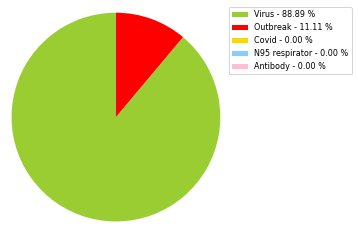

In [22]:
#testing
query_term = 'Coronavirus Origin' # select from the drop down
article = 'https://www.webmd.com/lung/coronavirus-history' # get from user
output = completeOutput(query_term,article)
title = output[0]
abstract = output[1]
article_date = output[2]
TotalCases= output[3]
NewCases= output[4]
TotalDeaths = output[5]
NewDeaths = output[6]
TotalRecovered = output[7]
prediction = output[8]


In [23]:
print(title)
print(abstract)
print(article_date)
print(TotalCases)
print(NewCases)
print(TotalDeaths)
print(NewDeaths)
print(TotalRecovered)
print(prediction)
print(output[9].show)

Coronavirus History: Origin and Evolution
Coronaviruses are a large family of different viruses and have coexisted with humans for a long time. The leap from animals to humans, however, is new. Learn more about coronaviruses here.
2021-08-15
2,407,382

28,138 

2,297,289
1
<bound method Figure.show of <Figure size 432x288 with 1 Axes>>


In [24]:
output[9].savefig('piechart.png',bbox_inches='tight')
